<a href="https://colab.research.google.com/github/thuyd12/Web-scraping/blob/main/Competitor_web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 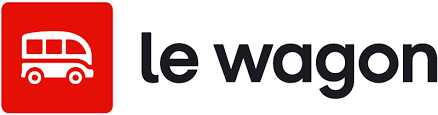

# Get competitor's products and prices info

## Naturalia website

a) Naturalia is a French company selling green products. It's one of the main competitors of Greenweez.

Go to [this website](https://www.naturalia.fr/catalogsearch/result/?q=compote) and study the url. What are endpoint and query parameter ?

Endpoint is "https://www.naturalia.fr/catalogsearch/result/" and query parameter is "q"

b) With requests & beautiful soup libraries, convert html code to beautoful soup object in a `soup` variable.


In [ ]:
import requests
from bs4 import BeautifulSoup

term = "compote"
url = "https://www.naturalia.fr/catalogsearch/result/?q=" + term

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
url

'https://www.naturalia.fr/catalogsearch/result/?q=compote'

c) We want to get all products info from the page, inspect the html code and find which html tag is used to contain each product.

`li` tags with class "product-item-link"

d) Use BeautifulSoup's method `find_all()` to get all `li` tags having class "item product product-item"


In [ ]:
# all items
items = soup.find_all("li", {"class": "item product product-item"})

e) What is the type of `items` variable ? Look at the first product info. Store the first item in a `item` variable.

In [ ]:
# items is a list
item = items[0]
item

<li class="item product product-item"> <div class="product-item-info" data-container="product-grid">
<p class="product name product-item-name">
<a class="product-item-link" href="https://www.naturalia.fr/compot-pomme-chataigne-4x100g">
                                    Compote de pomme &amp; châtaigne 4x100G Bio							</a>
</p>
<p class="product-item-brand">Danival</p>
<div class="product-item-photo">
<p class="banner discount more-than-thirty ">-30%</p>
<a class="product photo" href="https://www.naturalia.fr/compot-pomme-chataigne-4x100g" tabindex="-1">
<span class="product-image-container product-image-container-52783">
<span class="product-image-wrapper">
<img alt="Compote de pomme &amp; châtaigne 4x100G Bio" class="product-image-photo" height="233" loading="lazy" src="https://media.naturalia.fr/media/catalog/product/cache/c97961dbe2ef8ae9072b778469b58f9a/3/4/3431590014080.jpg" width="233"/></span>
</span>
<style>.product-image-container-52783 {
    width: 233px;
}
.product-image-

f) html result is not pretty and difficult to read. 

Use your browser to locate which tags are used for product info.
Deduct how to get product url and product name.

In [ ]:
item_description = item.find("a", {"class": "product-item-link"})

url = item_description.get("href")
print(url)
product_name = item_description.text.strip()
print(product_name)

https://www.naturalia.fr/compot-pomme-chataigne-4x100g
Compote de pomme & châtaigne 4x100G Bio


g) Do the same to find how to get price. 
We will use `strip()` and `replace()` methods to clean text and replaces "," by "."

In [ ]:
# price
price = float(item.find("span", {"class":"price"}).text.strip().replace("\xa0€", "").replace(",", "."))
price

3.6

h) Iterate over all products and create a list of dictionaries with their info (url, product_name and price).

Then, create a DataFrame from the data.

In [ ]:
import pandas as pd

# all products info
products = []

# iterate over items
for item in items:

    # product item_description
    item_description = item.find("a", {"class": "product-item-link"})
    url = item_description.get("href")
    product_name = item_description.text.strip()
    # price
    price = float(item.find("span", {"class":"price"}).text.strip().replace("\xa0€", "").replace(",", "."))

    # product info
    product_info = {
        "price": price,
        "product_name": product_name,
        "url": url
    }
    products.append(product_info)

df = pd.DataFrame(products)
df

,price,product_name,url
0,3.60,Compote de pomme & châtaigne 4x100G Bio,https://www.naturalia.fr/compot-pomme-chataign...
1,8.06,Purée de cacahuètes 650g Bio,https://www.naturalia.fr/puree-de-cacahuetes-650g
2,4.78,Purée de cacahuètes 350g Bio,https://www.naturalia.fr/puree-de-cacahuetes-350g
3,1.25,Purée de banane en gourde 120g Bio,https://www.naturalia.fr/gourde-puree-banane-120g
4,1.25,Purée de pommes en gourde 120g Bio,https://www.naturalia.fr/gourde-puree-pomme-120g
5,1.40,Purée de carotte en gourde 120g Bio,https://www.naturalia.fr/gourde-puree-carotte-...
6,1.69,Gourde de Fraise dès 6M 120g Bio,https://www.naturalia.fr/grde-fraise-120g
7,1.69,Gourde d'Abricot dès 4M 120g Bio,https://www.naturalia.fr/grde-abricot-120g
8,2.10,Gourde de Myrtilles dès 4M 120g Bio,https://www.naturalia.fr/grde-myrtilles-120g
9,8.67,Compote de Pêche 725G Bio,https://www.naturalia.fr/compote-peche-725g


i) Do you have all naturalia products ?

Without doing it, how can you do to get products from next page ?

Get url and use our previous code to web scrap.

j) Use your web browser inspector to find html tag having the next page url.
Extract it with Python in a `next_page_url` variable.

In [ ]:
next_page_item = soup.find("li", {"class": "item pages-item-next"})
next_page_url = next_page_item.find("a", {"class": "action next"}).get("href")
next_page_url

'https://www.naturalia.fr/catalogsearch/result/index/?p=2&q=compote'

k) How do we know when there is no additional pages ? Use your inspector to find out.

There is no more `li` tag with class "item pages-item-next" !

l) [Difficult] Create a final function that will take a term as parameter (like we did with "compote") and will return all products info of all pages in a DataFrame variable.

hint: 
- use a while condition to iterate over pages until there is not next page

In [ ]:
def naturalia_web_scraper(term):
  
  url = "https://www.naturalia.fr/catalogsearch/result/?q=" + term
  next_page = True
  # all products info
  products = []
  
  while(next_page):
    # get items
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    items = soup.find_all("li", {"class": "item product product-item"})

    # iterate over items
    for item in items:

        # product item_description
        item_description = item.find("a", {"class": "product-item-link"})
        url = item_description.get("href")
        product_name = item_description.text.strip()
        # price
        price = float(item.find("span", {"class":"price"}).text.strip().replace("\xa0€", "").replace(",", "."))

        # product info
        product_info = {
            "price": price,
            "product_name": product_name,
            "url": url
        }
        products.append(product_info)

    # test for next page
    next_page_item = soup.find("li", {"class": "item pages-item-next"})
    if(next_page_item):
      next_page_url = next_page_item.find("a", {"class": "action next"}).get("href")
      url = next_page_url
    else:
      next_page = False

  # combine all products in a single DataFrame
  df = pd.DataFrame(products)
  df
  
  return df


df_products = naturalia_web_scraper("compotes")
df_products

,price,product_name,url
0,8.06,Purée de cacahuètes 650g Bio,https://www.naturalia.fr/puree-de-cacahuetes-650g
1,4.78,Purée de cacahuètes 350g Bio,https://www.naturalia.fr/puree-de-cacahuetes-350g
2,3.60,Compote de pomme & châtaigne 4x100G Bio,https://www.naturalia.fr/compot-pomme-chataign...
3,2.99,Purée de pommes sans sucres ajoutés 705G Bio,https://www.naturalia.fr/puree-pommes-705g
4,4.64,Purée Pommes Poires sans sucres ajoutés 705G Bio,https://www.naturalia.fr/puree-pommes-poires-705g
...,...,...,...
102,2.75,"Petits pots de Pomme, Banane & Coco dès 6M 2x1...",https://www.naturalia.fr/pots-pom-banane-coco-...
103,2.54,Gourde de Framboise dès 6M 120g Bio,https://www.naturalia.fr/grde-framboise-120g
104,12.19,Gourdes Fruits à boire 12M 8x120Ml Bio,https://www.naturalia.fr/gourdes-fruits-a-boir...
105,1.68,Gourde Pomme Framboise dès 4M 120g Bio,https://www.naturalia.fr/compote-de-fruit-pour...


m) [Difficult] Try to extract g quantity from product_name with a regex. 

Hint: have a look at [the documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html)

In [ ]:
df_products["product_name"].str.lower().str.extract(r'(?<![\-\/])(\d+(?:\.?\d+)) *g\b')

,0
0,650
1,350
2,100
3,705
4,705
...,...
102,130
103,120
104,NaN
105,120


n) Let say we want to proceed same way with walmart instead of naturalia.

Try to extract html with beautifulsoup from [this url](https://www.walmart.ca/parcourir/epicerie/collations-bonbons/coupes-compote-pommes-puree-fruits/10019-6000194328523-6000195492964), is it working ?

In [ ]:
walmart_url = "https://www.walmart.ca/parcourir/epicerie/collations-bonbons/coupes-compote-pommes-puree-fruits/10019-6000194328523-6000195492964"

response = requests.get(walmart_url)
response.text

'<!DOCTYPE html>\n<html lang=en><head><link href="//www.googletagservices.com" rel=dns-prefetch /><link href="//www.googletagmanager.com" rel=dns-prefetch /><link href="//dynamic.criteo.com" rel=dns-prefetch /><link href="//assets.adobedtm.com" rel=dns-prefetch /><link href="//i.walmartimages.ca" rel=dns-prefetch /><link href="//i5.walmartimages.com" rel=dns-prefetch /> <script>var perf=window&&window.performance;if(perf&&perf.mark){perf.mark("perf-init-mark");}</script><meta charset=UTF-8 /> <meta name=viewport content="width=device-width, initial-scale=1.0, maximum-scale=1"/><link rel=apple-touch-icon sizes=57x57 href="/assets/bsp-render/js/icons-e870d2b4446978b0bf0f2646be757a69/apple-touch-icon-57x57.png"/><link rel=apple-touch-icon sizes=60x60 href="/assets/bsp-render/js/icons-e870d2b4446978b0bf0f2646be757a69/apple-touch-icon-60x60.png"/><link rel=apple-touch-icon sizes=72x72 href="/assets/bsp-render/js/icons-e870d2b4446978b0bf0f2646be757a69/apple-touch-icon-72x72.png"/><link rel=a

It is not working because walmart is using anti web scraping system. We need to use selenium.